# Imports

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(0)

# Environment Variables

In [73]:
TASK_TYPES = {
    "academic" : 0,
    "personal" : 1,
    "work" : 2,
    "exercise" : 3,
    "meeting" : 4
}

TASK_TYPES_ARR = [
    "academic",
    "personal",
    "work",
    "exercise",
    "meeting"
]

COL_NAMES = ['length', 'time', 'type', 'dayofweek', 'completed']

# Histograms of Data

(202, 4) [1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0
 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1
 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0
 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1
 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1]
0
(100, 5)
1
(102, 5)


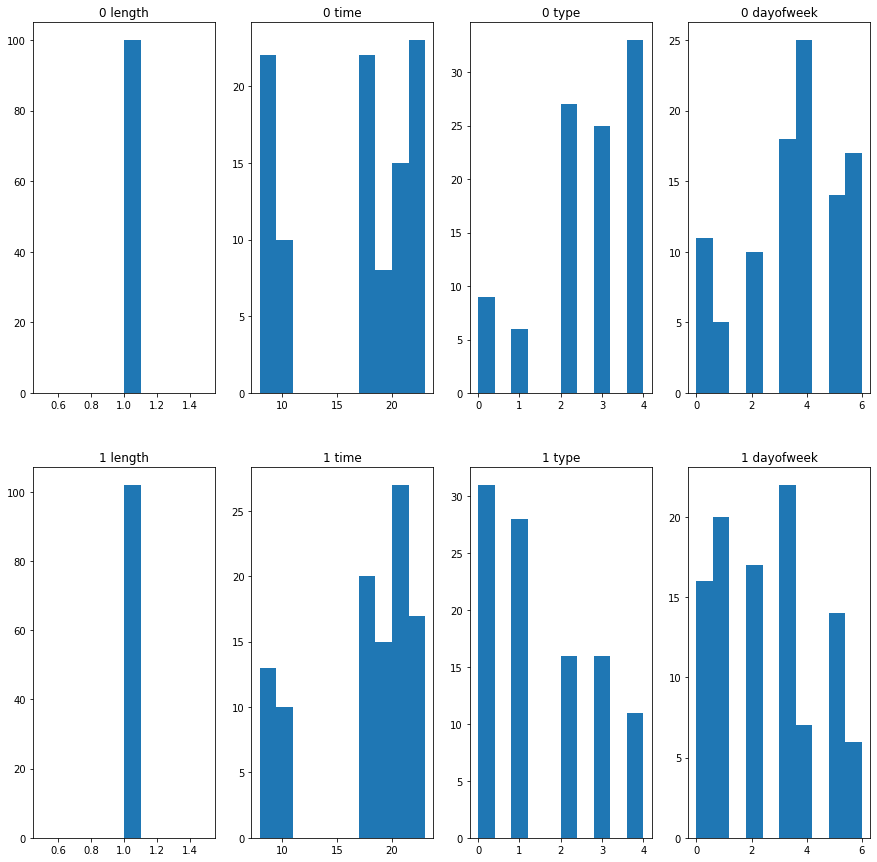

In [97]:
df = pd.read_csv('data.txt', sep="\t", names=['length', 'time', 'timeformat', 'type', 'description', 'dayofweek', 'completed'])

for index, row in df.iterrows():
    df.loc[index, "type"] = TASK_TYPES[df.loc[index, "type"]]

df.drop(columns=["timeformat", "description"], inplace=True)

values = df.values
X = df.values[:, 0:-1]
Y = df.values[:, -1]
print(X.shape, Y)

fig, axs = plt.subplots(2, 4, figsize=[15, 15])

for i in np.unique(Y):
    print(i)
    vals = values[values[:, -1] == i]
    print(vals.shape)
    for j in range(4):
        axs[i, j].set_title(str(i) + " " + COL_NAMES[j])
        axs[i, j].hist(vals[:, j])

# Distribution of Data Points

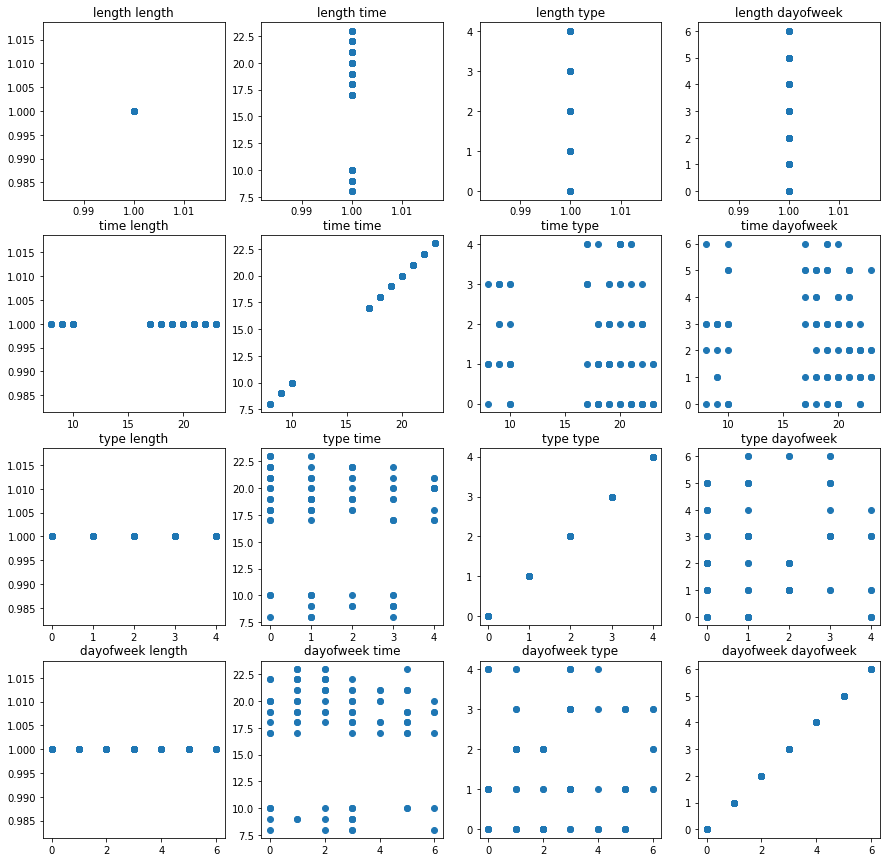

In [100]:
df = pd.read_csv('data.txt', sep="\t", names=['length', 'time', 'timeformat', 'type', 'description', 'dayofweek', 'completed'])

for index, row in df.iterrows():
    df.loc[index, "type"] = TASK_TYPES[df.loc[index, "type"]]

df.drop(columns=["timeformat", "description"], inplace=True)

values = df.values
X = df.values[:, 0:-1]
Y = df.values[:, -1]

values = values[values[:, -1] == 0]

fig, axs = plt.subplots(4, 4, figsize=[15, 15])

for i in range(4):
    for j in range(4):
        axs[i, j].set_title(COL_NAMES[i] + " " + COL_NAMES[j])
        axs[i, j].scatter(vals[:, i], vals[:, j])

# Linear Regression

In [124]:
df = pd.read_csv('data.txt', sep="\t", names=['length', 'time', 'timeformat', 'type', 'description', 'dayofweek', 'completed'])

for index, row in df.iterrows():
    df.loc[index, "type"] = TASK_TYPES[df.loc[index, "type"]]

df.drop(columns=["timeformat", "description"], inplace=True)

values = df.values
X = df.values[:, 0:-1]
Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

regression = LinearRegression()  
regression.fit(X_train, Y_train)
print(regression.coef_)

Y_pred = regression.predict(X_test)
Y_pred = [(1 if x > .5 else 0) for x in Y_pred]
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

[ 0.          0.00648721 -0.13516185 -0.05374465]
Mean Absolute Error: 0.2727272727272727


# KNN Classifier

In [133]:
df = pd.read_csv('data.txt', sep="\t", names=['length', 'time', 'timeformat', 'type', 'description', 'dayofweek', 'completed'])

for index, row in df.iterrows():
    df.loc[index, "type"] = TASK_TYPES[df.loc[index, "type"]]

df.drop(columns=["timeformat", "description"], inplace=True)

values = df.values
X = df.values[:, 0:-1]
Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
Y_pred = [(1 if x > .5 else 0) for x in Y_pred]
print('Mean Absolute Error:', metrics.accuracy_score(Y_test, Y_pred)) 

Mean Absolute Error: 0.9090909090909091


# 